<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Mahotas_Fracionado_teste_009_nov_18_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

In [0]:
# proximas etapas que falta : dividir a foto em 10x10 e aplicar o mahotas em cada foto
# encontrar 
# GLCM?
# COLOCAR MAIS VARIAVEIS NAS FOTOS
# VER QUAIS PARAMETROS USAR PARA CALCULAR O PSD (particle size distribution)
# GERAR AS IMAGENS ARTIFICIAIS

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
%matplotlib inline

In [4]:
!wget http://ftp.feq.ufu.br/ubirajara/Amostras_Q6.zip
Transfere='Amostras_Q6.zip'

--2019-11-18 15:33:36--  http://ftp.feq.ufu.br/ubirajara/Amostras_Q6.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1785927 (1.7M) [application/zip]
Saving to: ‘Amostras_Q6.zip.1’

Amostras_Q6.zip.1   100%[===================>]   1.70M   835KB/s    in 2.1s    

2019-11-18 15:33:39 (835 KB/s) - ‘Amostras_Q6.zip.1’ saved [1785927/1785927]



In [0]:
#!ls

In [0]:
Size=1000 # tamanho da foto
Sub_Size=120 # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:

file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [8]:
print(file_name)

<zipfile.ZipFile filename='Amostras_Q6.zip' mode='r'>


--2019-11-18 15:33:41--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip.1’

quadrado_v2.zip.1   100%[===================>]  21.76M  5.66MB/s    in 4.1s    

2019-11-18 15:33:45 (5.34 MB/s) - ‘quadrado_v2.zip.1’ saved [22819538/22819538]



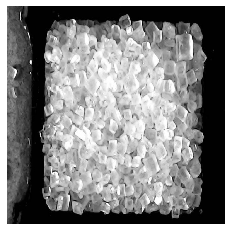

In [9]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
# all images are load in variable x...
FILE=Transfere
img_name=[]
xw=[]
ww=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #xw.append(cv2.imread(name))
        xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pw=np.zeros((nrow,ncol))
#pw=[]
for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()

plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [0]:
Nomes=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']


In [11]:
#foto 0 (k=0)
k=0
p_foto=pw[k,:].reshape(Size,Size)
GLCM=[]
glcm_haralick=[]
x_ref=[]
Count=Sub_Size
p=np.zeros((Sub_Size,Sub_Size))
j_ref=0
Cada_foto=[]
Posicao_X=[]
Posicao_Y=[]
for k in range(Size):
  if((k+Sub_Size-1)<Size):
    #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
    for i in range(Sub_Size):
      Posicao_X.append(Crop+i)
      for j in range(Sub_Size):
        p[i,j]=p_foto[Crop+i,j+k]
        Posicao_Y.append(j+k)

    WW=np.copy(p) 
    Cada_foto.append(WW.ravel())
    x_ref.append(Count-Sub_Size)
    Count=Count+1
    
    Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Nomes)
    
    GLCM=[]
    for ii in Nomes:
      GLCM.append(Mahotas[ii].mean())
      #print('cheguei aqui!!!')
    glcm_haralick.append(GLCM)

df=pd.DataFrame(glcm_haralick,columns=Nomes)
print(df)
#print(Cada_foto)

          ASM  constrast    correl  ...  dif entropy      IMC1      IMC2
0    0.001183  49.817922  0.978068  ...     3.080387 -0.470078  0.999051
1    0.001330  49.706650  0.978777  ...     3.075523 -0.472743  0.999076
2    0.001506  49.578245  0.979430  ...     3.070202 -0.475425  0.999102
3    0.001702  49.483890  0.980001  ...     3.066061 -0.477592  0.999117
4    0.001942  49.416673  0.980490  ...     3.063623 -0.479582  0.999131
..        ...        ...       ...  ...          ...       ...       ...
876  0.544142  38.157641  0.986126  ...     1.618187 -0.598078  0.972861
877  0.556576  36.737394  0.986200  ...     1.573364 -0.600315  0.970517
878  0.569150  36.256484  0.985932  ...     1.532566 -0.601867  0.967774
879  0.581866  35.844960  0.985619  ...     1.489202 -0.603754  0.964783
880  0.594722  35.381379  0.985282  ...     1.443195 -0.606500  0.961646

[881 rows x 13 columns]


In [12]:
print(np.max(Posicao_X))
print(np.min(Posicao_X))

619
500


In [13]:
print(np.max(Posicao_Y))
print(np.min(Posicao_Y))

999
0


In [14]:
print(np.array(Cada_foto).shape)

(881, 14400)


In [15]:
print(np.array(GLCM).shape)
print(Mahotas)

(13,)
        ASM  constrast    correl  ...  dif entropy      IMC1      IMC2
0  0.595016  37.745028  0.984296  ...     1.493963 -0.595370  0.960173
1  0.591898  38.409505  0.984001  ...     1.542629 -0.577361  0.956886
2  0.600196  10.525070  0.995667  ...     1.172381 -0.679227  0.973270
3  0.591776  54.845915  0.977163  ...     1.563808 -0.574043  0.956254

[4 rows x 13 columns]


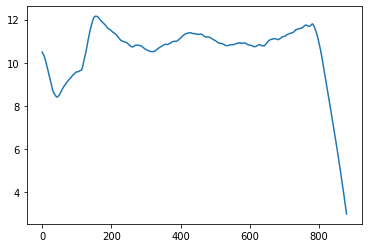

In [16]:
plt.plot(x_ref,df['entropy'])

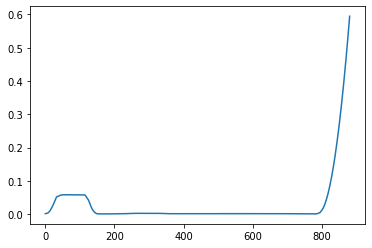

In [17]:
plt.plot(x_ref,df['ASM'])

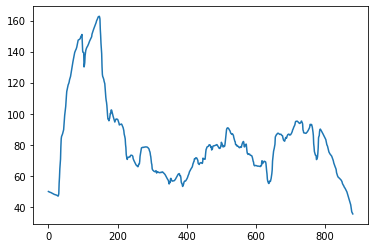

In [18]:
plt.plot(x_ref,df['constrast'])   

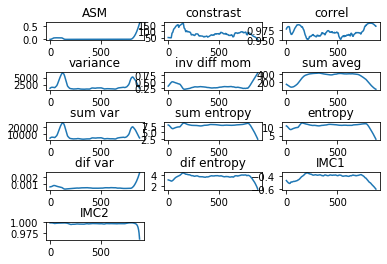

In [19]:

for i in range(1, 14):
    plt.subplot(5, 3, i)
    plt.plot(x_ref,df[Nomes[i-1]])
    plt.subplots_adjust(hspace = 1.8)
    #fig.tight_layout() 
    plt.title(Nomes[i-1])
    #plt.ylabel(Nomes[i-1])



    #plt.text(0.5, 0.5,Nomes[i-1]),fontsize=18, ha='center')

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


147.55147250076502


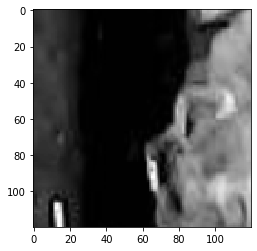

In [20]:
Num=np.argmax(df['constrast'])
Posicao=int(Num-Sub_Size/2)
plt.imshow(Cada_foto[Posicao].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[Posicao]) 

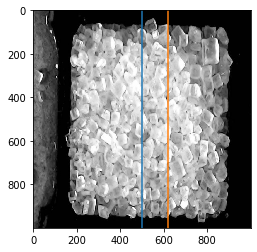

In [21]:
xv_min=[]
xv_max=[]
yv=[]
MAX_X=np.max(Posicao_X)
MIN_X=np.min(Posicao_X)
for i in range(Size):
  xv_min.append(MIN_X)
  xv_max.append(MAX_X)
  yv.append(i)
plt.imshow(ww[0], cmap = "gray")
plt.plot(xv_min,yv)
plt.plot(xv_max,yv)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


83.78587287856318
147.55147250076502
122.12802709319024
57.99905153237765
78.18692800649671
66.6018388237648
86.41602258550478
93.73191864981288


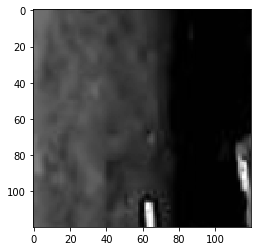

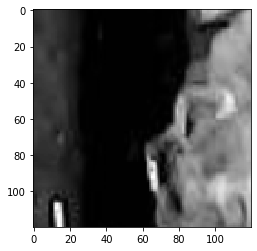

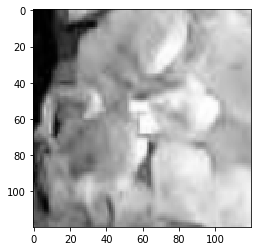

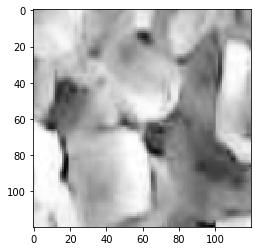

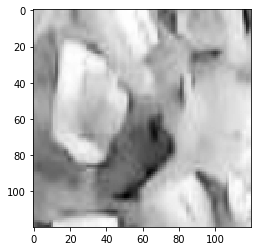

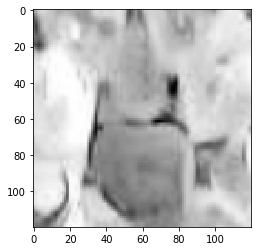

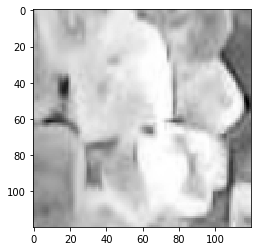

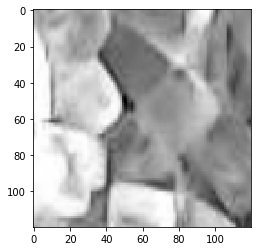

In [22]:
N_search=8 # number of subsets to search
row,col=np.array(Cada_foto).shape
for i in range(N_search):
  No=int(i/N_search*row)
  Nf=int((i+1)/N_search*row)
  df_search=df.iloc[No:Nf,:]
  Num=np.argmax(df_search['constrast'])
  Posicao=int(Num-Sub_Size/2)
  plt.figure(i+1)
  plt.imshow(Cada_foto[Posicao].reshape(Sub_Size,Sub_Size), cmap = "gray")
  print(np.array(df['constrast'])[Posicao]) 
